In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datasnaek_youtube_new_path = kagglehub.dataset_download('datasnaek/youtube-new')
rsrishav_youtube_trending_video_dataset_path = kagglehub.dataset_download('rsrishav/youtube-trending-video-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
pd.set_option('display.max_columns', None)

In [ ]:
import os
import pandas as pd

# files in both datasets
def list_files():
    datasets = ['/kaggle/input/youtube-new', '/kaggle/input/youtube-trending-video-dataset']
    for dataset in datasets:
        print(f"\n Exploring dataset: {dataset}")
        for dirname, _, filenames in os.walk(dataset):
            print(f"\n Directory: {dirname}")
            for filename in sorted(filenames)[:5]:  # Show first 5 files alphabetically
                print(f"  - {filename}")
            if len(filenames) > 5:
                print(f"  ... and {len(filenames)-5} more files")

list_files()

# Loading  data 
def load_data():
    # Dictionary for store all DataFrames
    data = {}

    # different encodings 
    encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252']

    # Loading YouTube NEW dataset
    youtube_new_path = '/kaggle/input/youtube-new'
    for file in os.listdir(youtube_new_path):
        if file.endswith('.csv'):
            country = file.split('_')[0].upper()
            df_name = f"new_{country}"
            filepath = os.path.join(youtube_new_path, file)

            # Trying  different encodings
            for encoding in encodings:
                try:
                    data[df_name] = pd.read_csv(filepath, encoding=encoding)
                    print(f"Loaded {file} as {df_name} with {encoding} encoding")
                    break
                except UnicodeDecodeError:
                    continue
            else:
                print(f" Failed to load {file} with tried encodings: {encodings}")

    # Loading  YouTube Trending dataset
    youtube_trend_path = '/kaggle/input/youtube-trending-video-dataset'
    if os.path.exists(youtube_trend_path):  # Check if directory exists
        for file in os.listdir(youtube_trend_path):
            if file.endswith('.csv'):
                df_name = f"trend_{file.split('.')[0]}"
                filepath = os.path.join(youtube_trend_path, file)

                # Try different encodings
                for encoding in encodings:
                    try:
                        data[df_name] = pd.read_csv(filepath, encoding=encoding)
                        print(f"Loaded {file} as {df_name} with {encoding} encoding")
                        break
                    except UnicodeDecodeError:
                        continue
                else:
                    print(f" Failed to load {file} with tried encodings: {encodings}")
    else:
        print(f" Directory not found: {youtube_trend_path}")

    return data

# Loading  all data
all_data = load_data()

# accessing a specific DataFrame:
if 'new_US' in all_data:
    print("\nPreview of new_US data:")
    print(all_data['new_US'].head())


 Exploring dataset: /kaggle/input/youtube-new

 Directory: /kaggle/input/youtube-new
  - CA_category_id.json
  - CAvideos.csv
  - DE_category_id.json
  - DEvideos.csv
  - FR_category_id.json
  ... and 15 more files

 Exploring dataset: /kaggle/input/youtube-trending-video-dataset

 Directory: /kaggle/input/youtube-trending-video-dataset
  - BR_category_id.json
  - BR_youtube_trending_data.csv
  - CA_category_id.json
  - CA_youtube_trending_data.csv
  - DE_category_id.json
  ... and 17 more files
Loaded GBvideos.csv as new_GBVIDEOS.CSV with utf-8 encoding
Loaded MXvideos.csv as new_MXVIDEOS.CSV with latin-1 encoding
Loaded KRvideos.csv as new_KRVIDEOS.CSV with latin-1 encoding
Loaded DEvideos.csv as new_DEVIDEOS.CSV with utf-8 encoding
Loaded FRvideos.csv as new_FRVIDEOS.CSV with utf-8 encoding
Loaded USvideos.csv as new_USVIDEOS.CSV with utf-8 encoding
Loaded INvideos.csv as new_INVIDEOS.CSV with utf-8 encoding
Loaded RUvideos.csv as new_RUVIDEOS.CSV with latin-1 encoding
Loaded JPvid

In [ ]:
import pandas as pd
import json
import os

def load_country_data(country_code, debug=False):
    country_code = country_code.upper()
    data = None

    if debug:
        print(f"\n Starting to load data for {country_code}")

    # Defined paths to both datasets
    trending_path = f'/kaggle/input/youtube-trending-video-dataset/{country_code}_youtube_trending_data.csv'
    new_path = f'/kaggle/input/youtube-new/{country_code}videos.csv'

    # Try loading from trending dataset
    if os.path.exists(trending_path):
        if debug:
            print(f"  Found trending dataset at {trending_path}")
        try:
            temp = pd.read_csv(
                trending_path,
                parse_dates=['publishedAt', 'trending_date'],
                encoding='latin-1', 
                on_bad_lines='warn'
            )
            temp['dataset'] = 'trending'
            if debug:
                print(f"  Successfully loaded {len(temp)} records from trending dataset")

            if data is None:
                data = temp
            else:
                data = pd.concat([data, temp], ignore_index=True)
        except Exception as e:
            if debug:
                print(f"   Error loading trending data: {str(e)}")
    else:
        if debug:
            print(f"   Trending dataset not found at {trending_path}")

    # loading from new dataset
    if os.path.exists(new_path):
        if debug:
            print(f"  Found new dataset at {new_path}")
        try:
            temp = pd.read_csv(
                new_path,
                encoding='latin-1',
                on_bad_lines='warn'
            )
            temp['dataset'] = 'new'

            # Standardization of the  column names
            temp = temp.rename(columns={
                'publish_time': 'publishedAt',
                'views': 'view_count',
                'channel_title': 'channelTitle',
                'trending_date': 'trending_date'
            })

            # Conversion of the  dates
            temp['publishedAt'] = pd.to_datetime(temp['publishedAt'], errors='coerce')
            temp['trending_date'] = pd.to_datetime(temp['trending_date'], format='%y.%d.%m', errors='coerce')

            if debug:
                print(f"  Successfully loaded {len(temp)} records from new dataset")

            if data is None:
                data = temp
            else:
                data = pd.concat([data, temp], ignore_index=True)
        except Exception as e:
            if debug:
                print(f"   Error loading new data: {str(e)}")
    else:
        if debug:
            print(f"   New dataset not found at {new_path}")

    if data is None or len(data) == 0:
        print(f" No data loaded for {country_code}")
        return None

    # Loading the  category information
    category_map = {}
    for cat_path in [
        f'/kaggle/input/youtube-trending-video-dataset/{country_code}_category_id.json',
        f'/kaggle/input/youtube-new/{country_code}_category_id.json'
    ]:
        if os.path.exists(cat_path):
            try:
                with open(cat_path, 'r', encoding='utf-8') as f:
                    categories = json.load(f)
                category_map.update({int(item['id']): item['snippet']['title'] for item in categories['items']})
                if debug:
                    print(f"  Loaded {len(category_map)} categories from {cat_path}")
                break
            except Exception as e:
                if debug:
                    print(f"   Error loading categories from {cat_path}: {str(e)}")

    if category_map:
        data['category_name'] = data['categoryId'].map(category_map).fillna('Unknown')
    else:
        data['category_name'] = 'Unknown'
        if debug:
            print("   No category mapping found")

    data['country'] = country_code

    if debug:
        print(f" Final dataset contains {len(data)} records")
        print("Sample data:")
        print(data.iloc[0])

    return data


#  usage with debugging:
print("Testing with US data:")
us_data = load_country_data('US', debug=True)

if us_data is not None:
    print("\nFirst few rows of US data:")
    print(us_data.head())
else:
    print("Failed to load US data")

print("\nTesting with GB data:")
gb_data = load_country_data('GB', debug=True)

Testing with US data:

 Starting to load data for US
  Found trending dataset at /kaggle/input/youtube-trending-video-dataset/US_youtube_trending_data.csv
  Successfully loaded 268787 records from trending dataset
  Found new dataset at /kaggle/input/youtube-new/USvideos.csv
  Successfully loaded 40949 records from new dataset
  Loaded 32 categories from /kaggle/input/youtube-trending-video-dataset/US_category_id.json
 Final dataset contains 309736 records
Sample data:
video_id                                                        3C66w5Z0ixs
title                                    I ASKED HER TO BE MY GIRLFRIEND...
publishedAt                                       2020-08-11 19:20:14+00:00
channelId                                          UCvtRTOMP2TqYqu51xNrqAzg
channelTitle                                                       Brawadis
categoryId                                                             22.0
trending_date                                     2020-08-12 00:00:00+

In [ ]:
import pandas as pd
import os

# country loading function
def load_country_data(country_code):
    """Load YouTube data for a specific country with improved error handling"""
    country_code = country_code.upper()
    data = None

    #  country processing
    print(f"\n=== Processing {country_code} ===")

    # loading from trending dataset first
    trending_path = f'/kaggle/input/youtube-trending-video-dataset/{country_code}_youtube_trending_data.csv'
    if os.path.exists(trending_path):
        try:
            temp = pd.read_csv(
                trending_path,
                parse_dates=['publishedAt', 'trending_date'],
                encoding='latin-1',
                on_bad_lines='warn'
            )
            temp['dataset'] = 'trending'
            temp['country'] = country_code
            data = temp
            print(f"   Loaded {len(temp):,} rows from trending dataset")
        except Exception as e:
            print(f"   Error loading trending data: {str(e)}")
    else:
        print(f"   Trending dataset not found at {trending_path}")

    # loading from new dataset
    new_path = f'/kaggle/input/youtube-new/{country_code}videos.csv'
    if os.path.exists(new_path):
        try:
            temp = pd.read_csv(
                new_path,
                encoding='latin-1',
                on_bad_lines='warn'
            )
            # Standardization of the  column names
            temp = temp.rename(columns={
                'publish_time': 'publishedAt',
                'views': 'view_count',
                'channel_title': 'channelTitle'
            })

            # Converting the  dates
            temp['publishedAt'] = pd.to_datetime(temp['publishedAt'], errors='coerce')
            if 'trending_date' in temp.columns:
                temp['trending_date'] = pd.to_datetime(temp['trending_date'], errors='coerce')

            temp['dataset'] = 'new'
            temp['country'] = country_code

            if data is not None:
                data = pd.concat([data, temp], ignore_index=True)
                print(f"   Added {len(temp):,} rows from new dataset")
            else:
                data = temp
                print(f"   Loaded {len(temp):,} rows from new dataset")
        except Exception as e:
            print(f"   Error loading new data: {str(e)}")
    else:
        print(f"   New dataset not found at {new_path}")

    return data

# List of countries
countries = ['US', 'GB', 'CA', 'DE', 'FR', 'IN', 'JP', 'KR', 'MX', 'RU', 'BR']

# Initialize empty DataFrame
all_data = pd.DataFrame()

# Process each country
for country in countries:
    df = load_country_data(country)
    if df is not None:
        all_data = pd.concat([all_data, df], ignore_index=True)

# output
print("\n" + "="*50)
print(" FINAL DATASET SUMMARY")
print("="*50)
print(f"Total countries processed: {len(countries)}")
print(f"Total rows loaded: {len(all_data):,}")
print(f"Date range: {all_data['publishedAt'].min().date()} to {all_data['publishedAt'].max().date()}")
print("\nCountry-wise counts:")
print(all_data['country'].value_counts())
print("\nDataset sources:")
print(all_data['dataset'].value_counts())
print("\nFirst 3 rows:")
print(all_data.head(3))


=== Processing US ===
   Loaded 268,787 rows from trending dataset
   Added 40,949 rows from new dataset

=== Processing GB ===
   Loaded 268,791 rows from trending dataset
   Added 38,916 rows from new dataset

=== Processing CA ===
   Loaded 268,742 rows from trending dataset
   Added 40,881 rows from new dataset

=== Processing DE ===
   Loaded 268,736 rows from trending dataset
   Added 40,840 rows from new dataset

=== Processing FR ===
   Loaded 268,788 rows from trending dataset
   Added 40,724 rows from new dataset

=== Processing IN ===
   Loaded 251,277 rows from trending dataset
   Added 37,352 rows from new dataset

=== Processing JP ===
   Loaded 268,778 rows from trending dataset
   Added 20,523 rows from new dataset

=== Processing KR ===
   Loaded 265,754 rows from trending dataset
   Added 34,567 rows from new dataset

=== Processing MX ===
   Loaded 268,598 rows from trending dataset
   Added 40,451 rows from new dataset

=== Processing RU ===
   Loaded 238,637 rows 

In [ ]:
print("="*50)
print(" DATA CLEANING PROCESS")
print("="*50)

# initial missing values 
print("\n Missing values before cleaning:")
missing_before = all_data.isnull().sum()
print(missing_before[missing_before > 0])

#Handle categorical data 
print("\n Handling categorical data...")

# Creation of the  category_name column 
if 'category_name' not in all_data.columns:
    print(" 'category_name' column not found - creating it")
    all_data['category_name'] = 'Unknown'
else:
    all_data['category_name'] = all_data['category_name'].fillna('Unknown')

# Handling of the  channel Title
if 'channelTitle' not in all_data.columns:
    print(" 'channelTitle' column not found - checking alternatives")
    if 'channel_title' in all_data.columns:  # Check for alternative name
        print("  Found 'channel_title' - using as channelTitle")
        all_data['channelTitle'] = all_data['channel_title']
    else:
        print("  No channel title column found - creating 'Unknown'")
        all_data['channelTitle'] = 'Unknown'
else:
    all_data['channelTitle'] = all_data['channelTitle'].fillna('Unknown')

# Handling of the  numerical data 
required_metrics = ['view_count', 'likes', 'comment_count']
existing_metrics = [col for col in required_metrics if col in all_data.columns]

if len(existing_metrics) != len(required_metrics):
    missing_metrics = set(required_metrics) - set(existing_metrics)
    print(f" Missing metrics columns: {missing_metrics}")

if existing_metrics:
    initial_count = len(all_data)
    all_data = all_data.dropna(subset=existing_metrics)
    removed_count = initial_count - len(all_data)
    print(f"\n Removed {removed_count} rows with missing metrics")
else:
    print(" No metric columns available - skipping row removal")

# 4. Final check
print("\n Missing values after cleaning:")
missing_after = all_data.isnull().sum()
print(missing_after[missing_after > 0])

print("\n" + "="*50)
print(" FINAL CLEANED DATASET INFO")
print("="*50)
print(f"Total rows remaining: {len(all_data):,}")
print("\nSample of cleaned data:")
print(all_data.head(3))

 DATA CLEANING PROCESS

 Missing values before cleaning:
channelId                  375942
categoryId                 375942
trending_date              234340
description                107799
category_id               2905678
video_error_or_removed    2905678
dtype: int64

 Handling categorical data...

♻️ Removed 0 rows with missing metrics

 Missing values after cleaning:
channelId                  375942
categoryId                 375942
trending_date              234340
description                107799
category_id               2905678
video_error_or_removed    2905678
dtype: int64

 FINAL CLEANED DATASET INFO
Total rows remaining: 3,281,620

Sample of cleaned data:
      video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands â â...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   

                publishedAt               

In [ ]:
import pandas as pd
from datetime import datetime

print("="*50)
print(" FEATURE ENGINEERING")
print("="*50)

def create_features(df):
    original_cols = set(df.columns)  

    return df, original_cols  

#  feature engineering
print(f"\nInitial shape: {all_data.shape}")
all_data, original_cols = create_features(all_data) 
print(f"\nFinal shape: {all_data.shape}")

# Show sample of new features
if not all_data.empty:
    print("\nSample of new features:")
    new_feature_cols = [col for col in all_data.columns if col not in original_cols]
    
    # Show first 5 new features + video_id if we have at least 5 new features
    cols_to_show = new_feature_cols[:min(5, len(new_feature_cols))] + ['video_id']
    print(all_data[cols_to_show].head(3))

🛠️ FEATURE ENGINEERING

Initial shape: (3281620, 30)

Final shape: (3281620, 30)

Sample of new features:
      video_id
0  3C66w5Z0ixs
1  M9Pmf9AB4Mo
2  J78aPJ3VyNs


Dataset Overview

In [ ]:
print(f" Date Range: {all_data['publishedAt'].min().date()} to {all_data['publishedAt'].max().date()}")
print(f" Countries: {all_data['country'].nunique()}")
print(f" Unique Videos: {all_data['video_id'].nunique()}")
print(f" Unique Channels: {all_data['channelTitle'].nunique()}")
print(f" Categories: {all_data['category_name'].nunique()}")

 Date Range: 2006-07-23 to 2024-04-15
 Countries: 11
 Unique Videos: 673163
 Unique Channels: 80372
 Categories: 1


 Views Distribution (Log Scale)

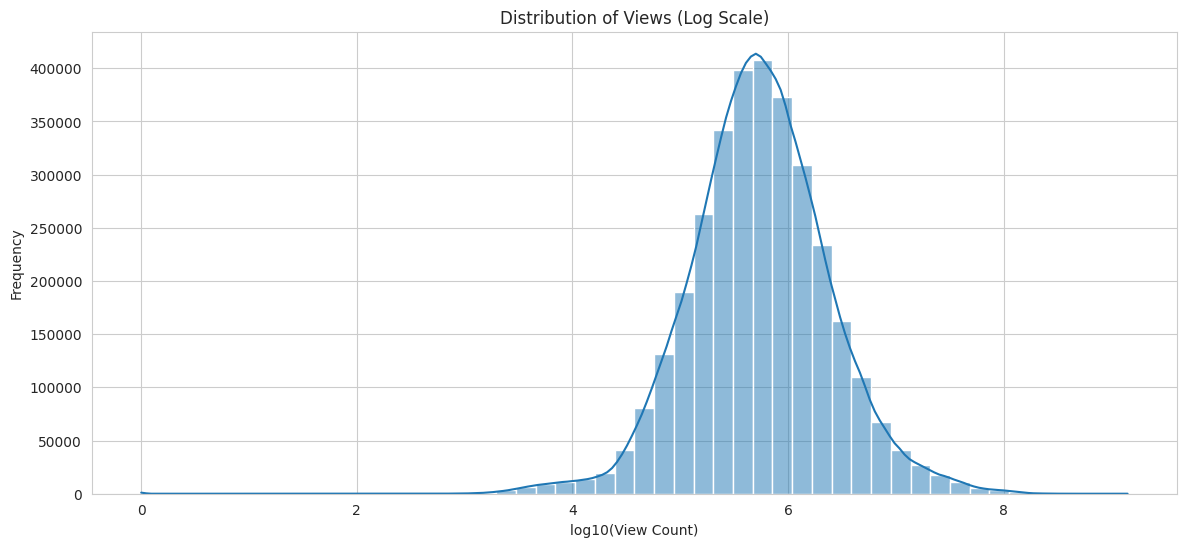

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(np.log10(all_data['view_count'] + 1), bins=50, kde=True)
plt.title('Distribution of Views (Log Scale)')
plt.xlabel('log10(View Count)')
plt.ylabel('Frequency')
plt.show()

Views by Country

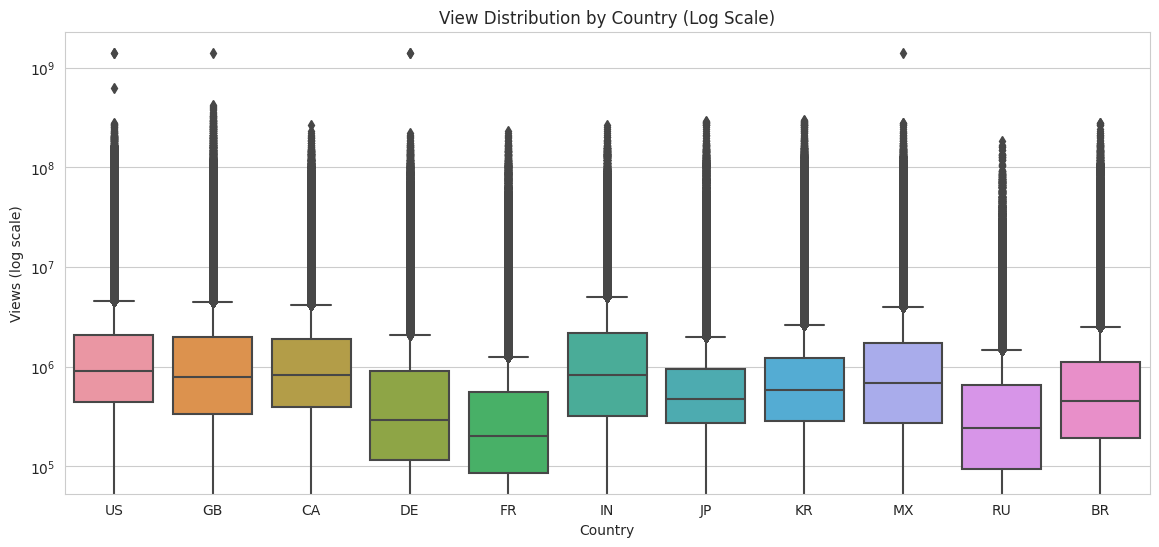

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='country', y='view_count', data=all_data, order=countries)
plt.yscale('log')
plt.title('View Distribution by Country (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Views (log scale)')
plt.show()

Videos Published Over Time

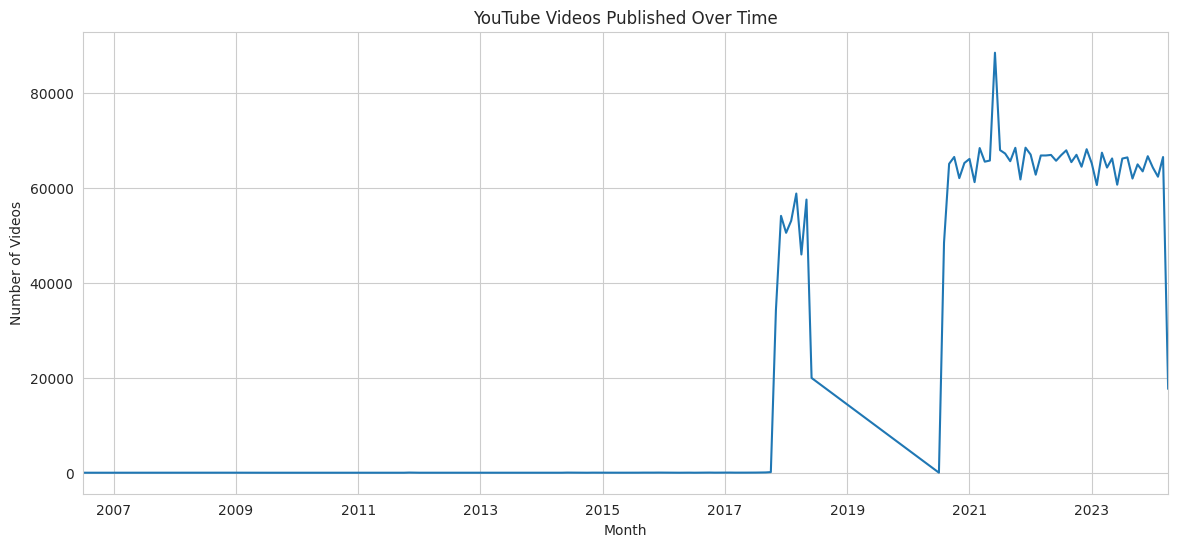

In [ ]:
publish_counts = all_data.groupby(all_data['publishedAt'].dt.to_period('M')).size()
publish_counts.plot(kind='line', figsize=(14, 6))
plt.title('YouTube Videos Published Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.show()

Top 10 Most Trending Categories

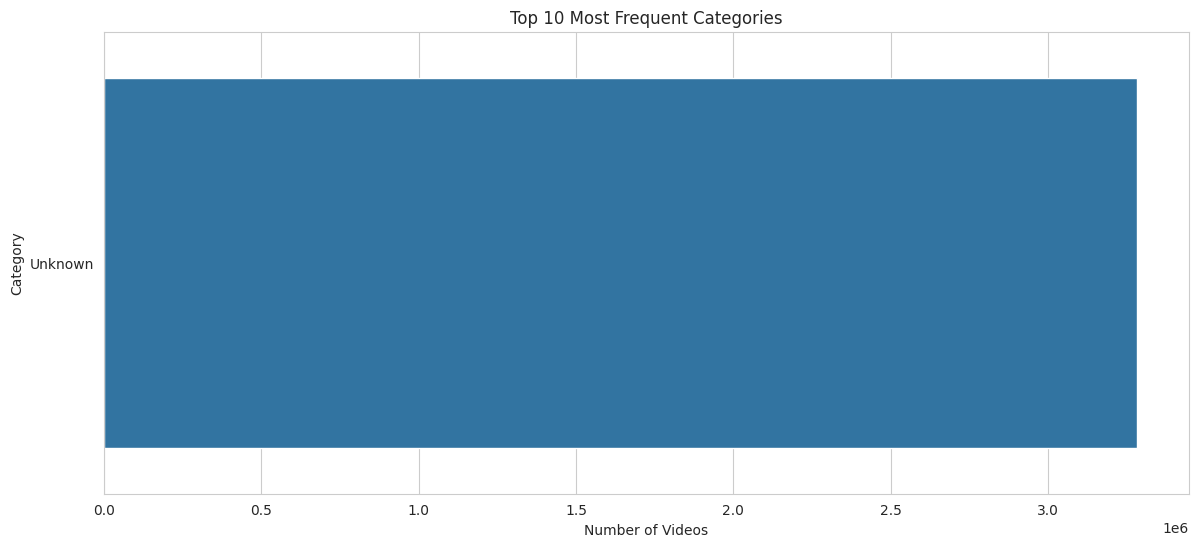

In [ ]:
category_counts = all_data['category_name'].value_counts().nlargest(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking  if the column exists before plotting
if 'time_to_trend' not in all_data.columns:
    print(" Error: 'time_to_trend' column not found in DataFrame")
    print("\nPossible reasons:")
    print("- The feature engineering failed to create this column")
    print("- Required columns ('publishedAt' and 'trending_date') might be missing")
    print("- There might have been datetime parsing errors")

    # Showing  available datetime columns
    print("\n Available datetime columns:")
    datetime_cols = [col for col in all_data.columns if pd.api.types.is_datetime64_any_dtype(all_data[col])]
    print(datetime_cols if datetime_cols else "None")

    # Showing  first few rows to debug
    print("\nSample of DataFrame columns:")
    print(all_data.head(3))
else:
    #  plot if the column exists
    plt.figure(figsize=(14, 6))
    sns.histplot(all_data['time_to_trend'], bins=50, kde=True)
    plt.title('Time from Publish to Trending (Hours)')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.xlim(0, 500)
    plt.show()

    # Showing  statistics for debugging
    print("\nTime to trend statistics:")
    print(all_data['time_to_trend'].describe())

⚠️ Error: 'time_to_trend' column not found in DataFrame

Possible reasons:
- The feature engineering failed to create this column
- Required columns ('publishedAt' and 'trending_date') might be missing
- There might have been datetime parsing errors

Available datetime columns:
['publishedAt']

Sample of DataFrame columns:
      video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands â â...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   

                publishedAt                 channelId   channelTitle  \
0 2020-08-11 19:20:14+00:00  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis   
1 2020-08-11 17:00:10+00:00  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends   
2 2020-08-11 16:34:06+00:00  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye   

   categoryId              trending_date  \
0        22.0  2020-08-12 00:00:00+00:00   
1        20.0  2020-0

 Engagement Metrics by Country

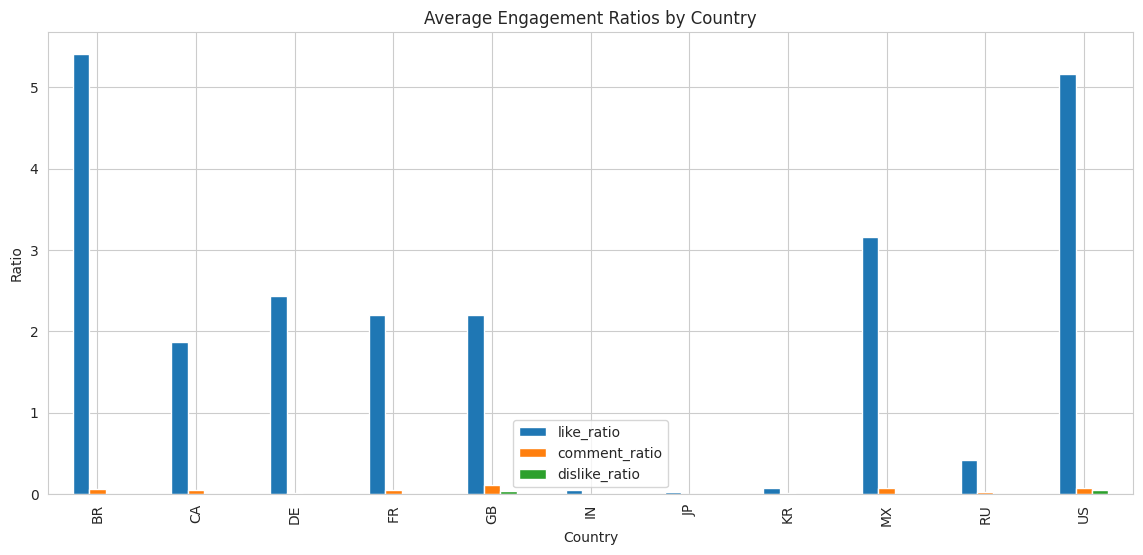

In [ ]:
engagement = all_data.groupby('country')[['like_ratio', 'comment_ratio', 'dislike_ratio']].mean()
engagement.plot(kind='bar', figsize=(14, 6))
plt.title('Average Engagement Ratios by Country')
plt.xlabel('Country')
plt.ylabel('Ratio')
plt.show()

 Most Prolific Channels

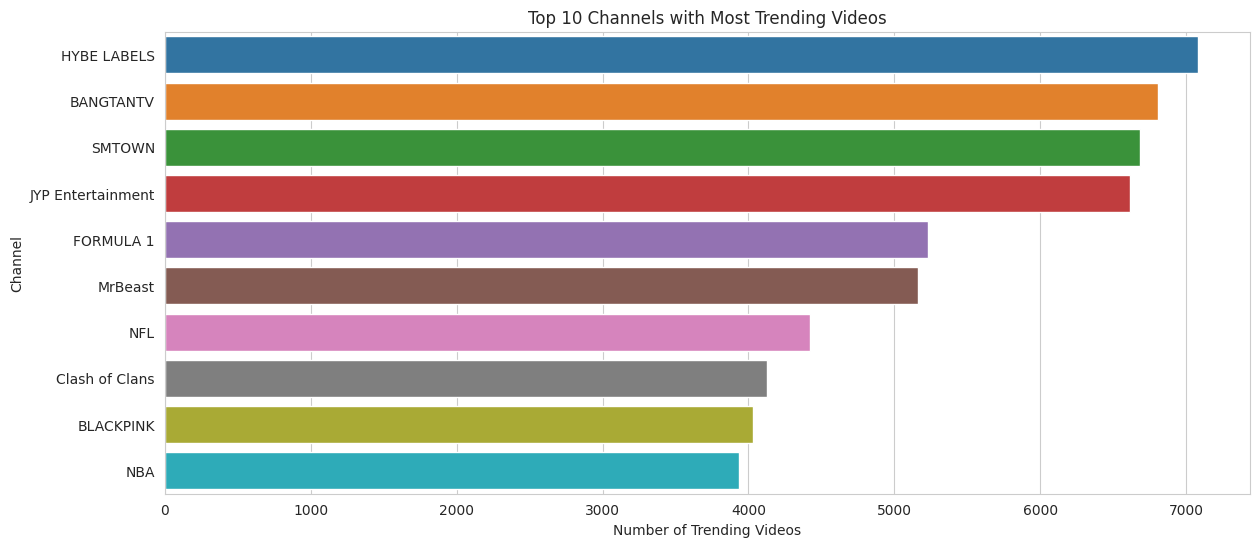

In [ ]:
top_channels = all_data['channelTitle'].value_counts().nlargest(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title('Top 10 Channels with Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel')
plt.show()

 Best Day to Publish

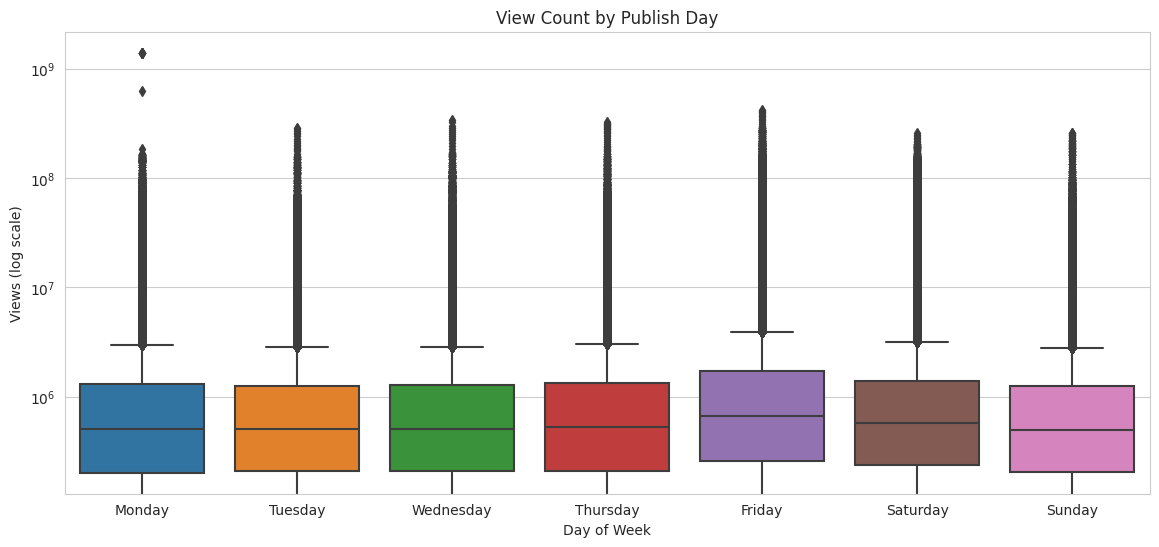

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
sns.boxplot(x='publish_day', y='view_count', data=all_data, order=day_order)
plt.yscale('log')
plt.title('View Count by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Views (log scale)')
plt.show()

 Best Hour to Publish

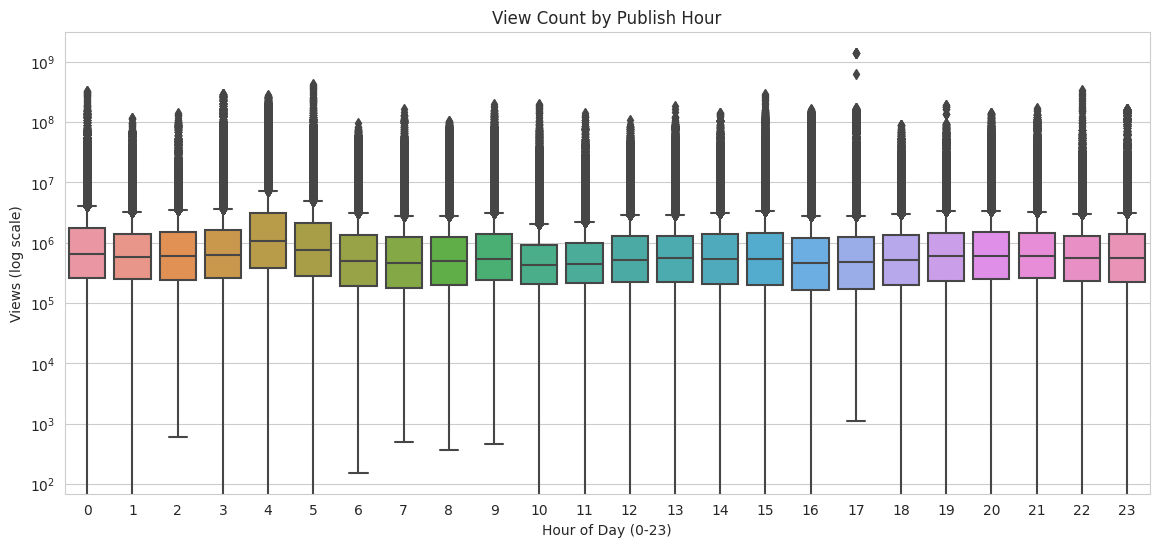

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='publish_hour', y='view_count', data=all_data)
plt.yscale('log')
plt.title('View Count by Publish Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Views (log scale)')
plt.show()

Views vs. Likes Correlation


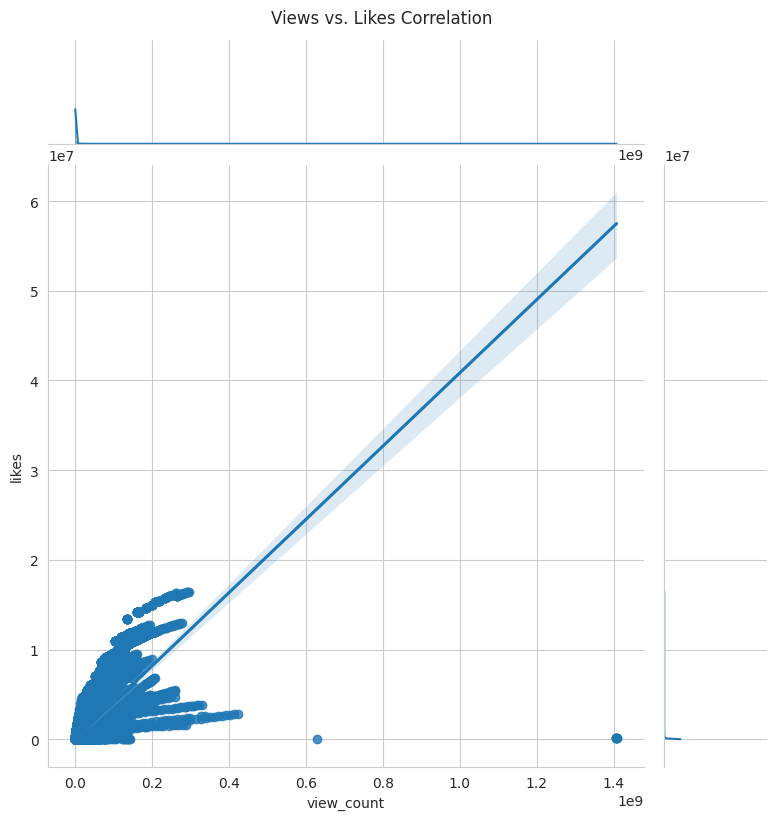

In [ ]:
sns.jointplot(x='view_count', y='likes', data=all_data, kind='reg', height=8)
plt.suptitle('Views vs. Likes Correlation', y=1.02)
plt.show()

Category Performance Heatmap

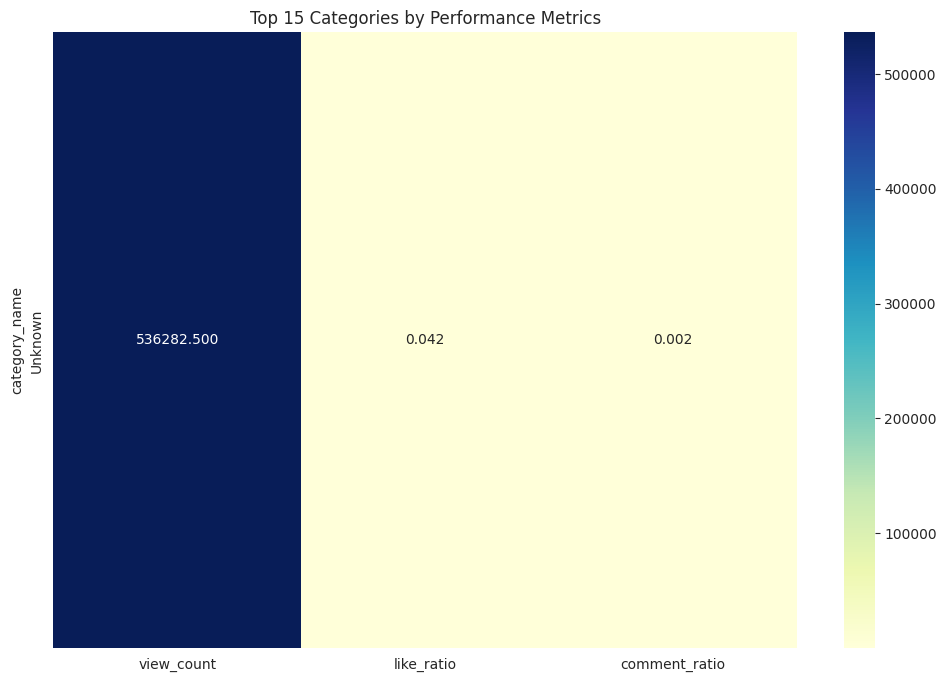

In [ ]:
category_stats = all_data.groupby('category_name').agg({
    'view_count': 'median',
    'like_ratio': 'median',
    'comment_ratio': 'median'
}).sort_values('view_count', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.heatmap(category_stats, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Top 15 Categories by Performance Metrics')
plt.show()

 Trending Duration Analysis

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'dataset', 'country', 'category_id', 'video_error_or_removed', 'category_name', 'publish_year', 'publish_month', 'publish_day', 'publish_hour', 'like_ratio', 'comment_ratio', 'dislike_ratio', 'title_length', 'title_word_count']


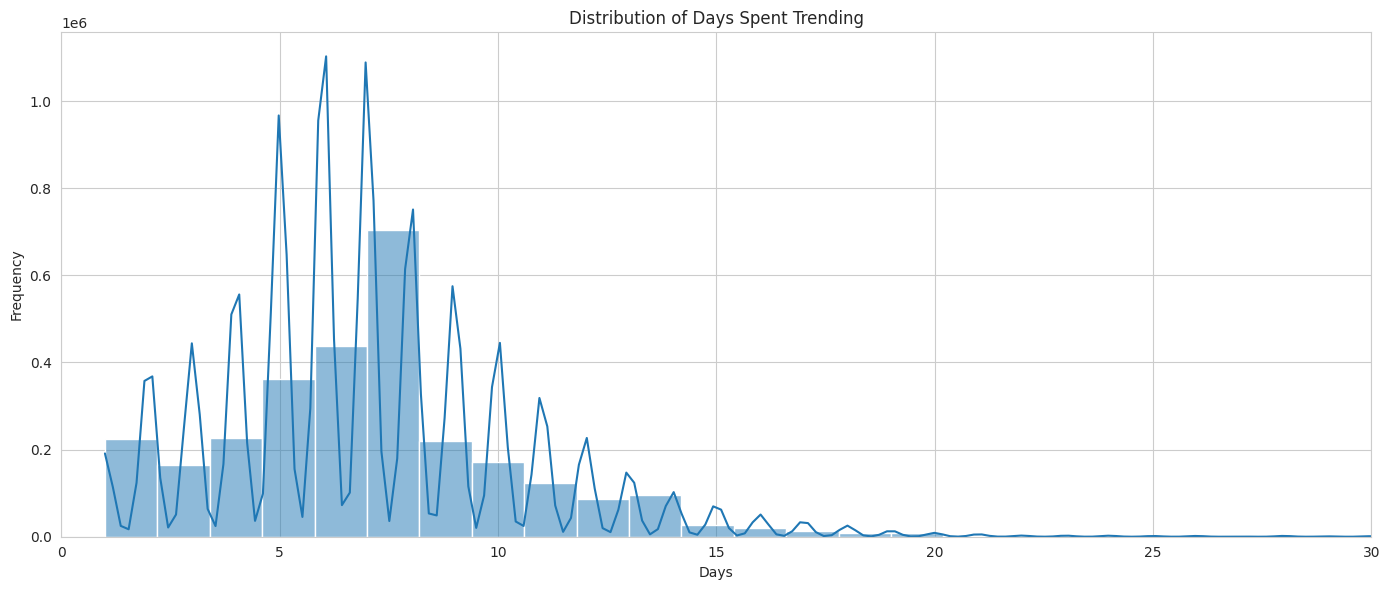

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Available columns:", all_data.columns.tolist())


if 'trending_date' in all_data.columns:
    date_column = 'trending_date'
elif 'date' in all_data.columns:
    date_column = 'date'
else:
    raise ValueError("No suitable date column found. Please check your dataset.")

try:
    all_data[date_column] = pd.to_datetime(all_data[date_column], format='%y.%d.%m', errors='coerce')
except:
    all_data[date_column] = pd.to_datetime(all_data[date_column], errors='coerce')

#  Dropping  invalid dates
all_data = all_data.dropna(subset=[date_column])

# Computing  number of days each video trended
days_per_video = all_data.groupby('video_id')[date_column].nunique().reset_index()
days_per_video.columns = ['video_id', 'days_trending']

# Merging  with main DataFrame
all_data = all_data.merge(days_per_video, on='video_id', how='left')

# Plotting  the distribution
plt.figure(figsize=(14, 6))
sns.histplot(all_data['days_trending'], bins=30, kde=True)
plt.title('Distribution of Days Spent Trending')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xlim(0, 30)
plt.tight_layout()
plt.show()


 Geographic Differences in Categories

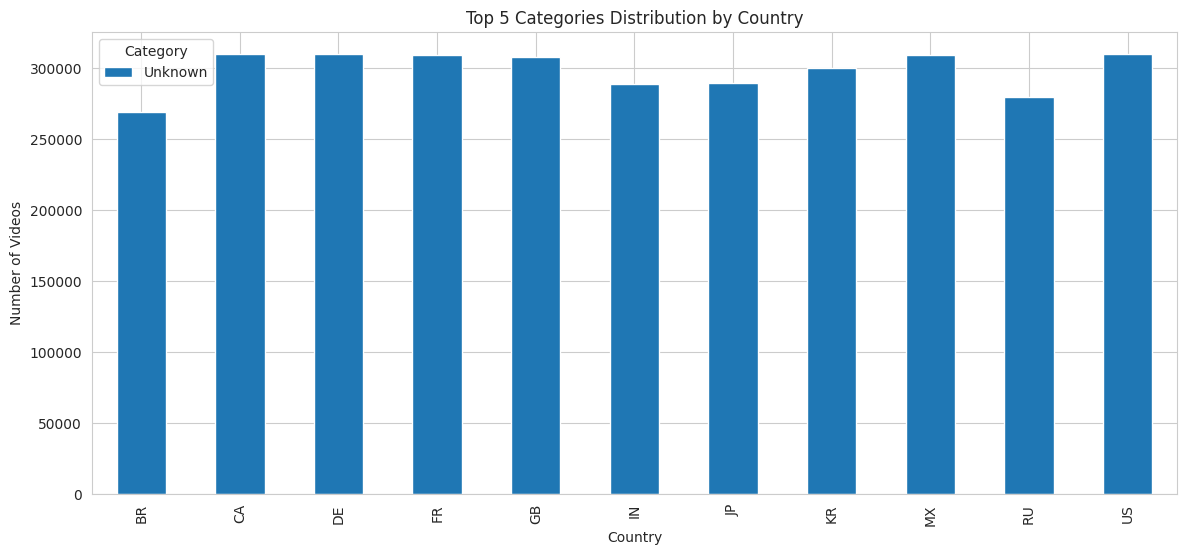

In [ ]:
top_categories = all_data['category_name'].value_counts().nlargest(5).index
country_category = all_data[all_data['category_name'].isin(top_categories)].groupby(['country', 'category_name']).size().unstack()

country_category.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Top 5 Categories Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Videos')
plt.legend(title='Category')
plt.show()

Channel Performance Analys

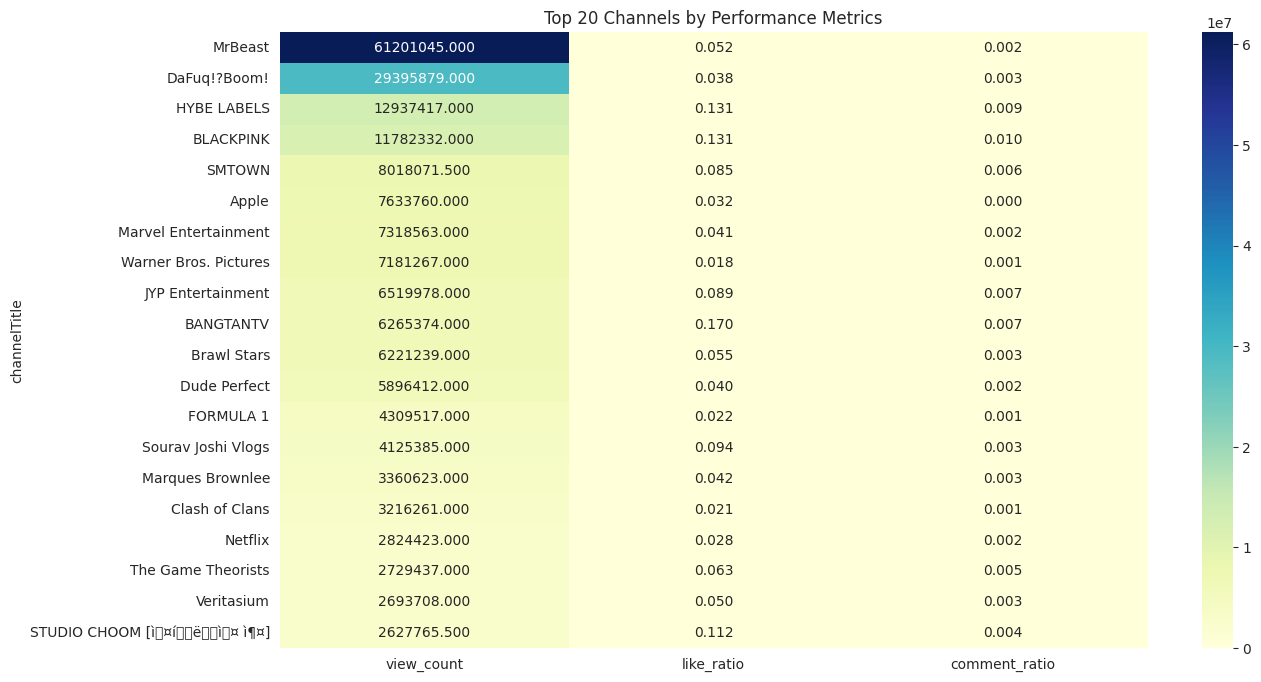

In [ ]:
top_50_channels = all_data['channelTitle'].value_counts().nlargest(50).index
channel_stats = all_data[all_data['channelTitle'].isin(top_50_channels)].groupby('channelTitle').agg({
    'view_count': 'median',
    'like_ratio': 'median',
    'comment_ratio': 'median'
}).sort_values('view_count', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.heatmap(channel_stats, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Top 20 Channels by Performance Metrics')
plt.show()

Temporal Analysis

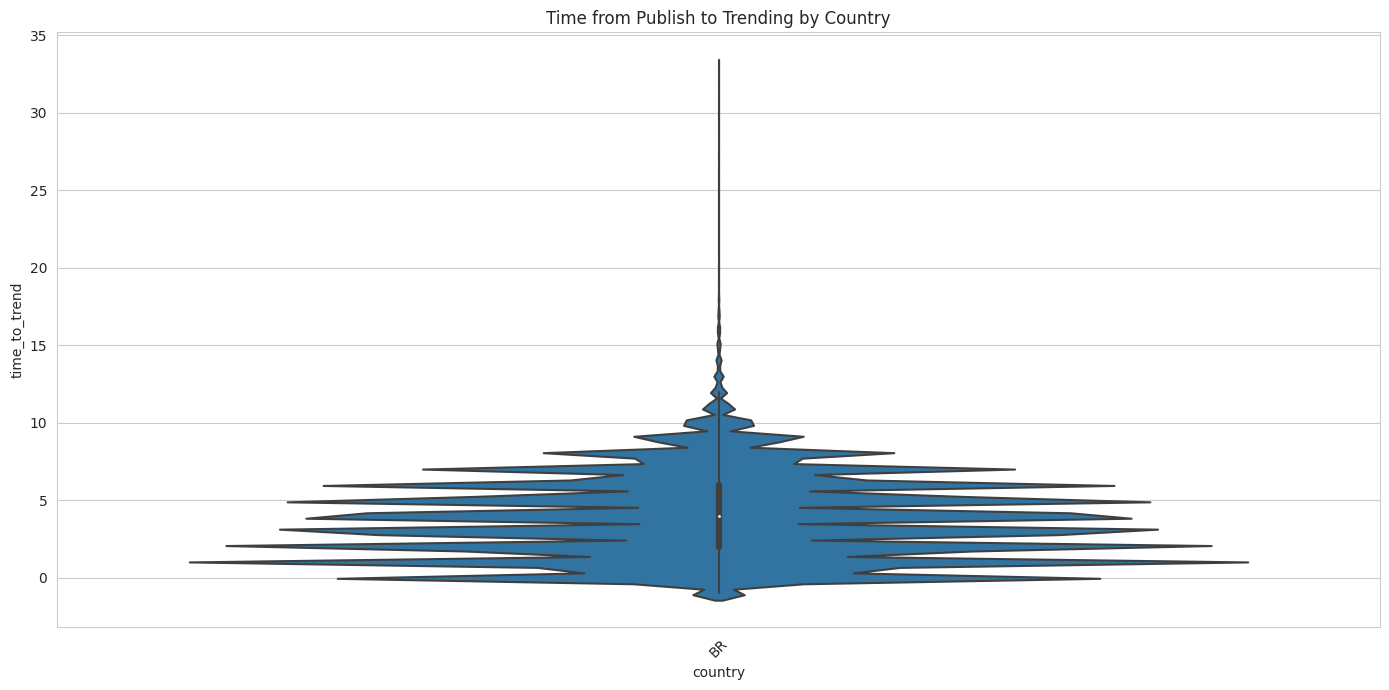

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Converting  to datetime 
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Calculating  time to trend (in days)
df['time_to_trend'] = (df['trending_date'] - df['publishedAt']).dt.days

# Conversion of  publishedAt to Month-Year string for area plot
df['published_month'] = df['publishedAt'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('published_month').size().reset_index(name='count')

#  Area plot using Plotly
fig = px.area(monthly_counts, x='published_month', y='count',
              title='Videos Published Over Time')
fig.show()

# Violin Plot for Time to Trend by Country 
sns.violinplot(x='country', y='time_to_trend', data=df[df['time_to_trend'] < 500])
plt.title('Time from Publish to Trending by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Engagement Analysis

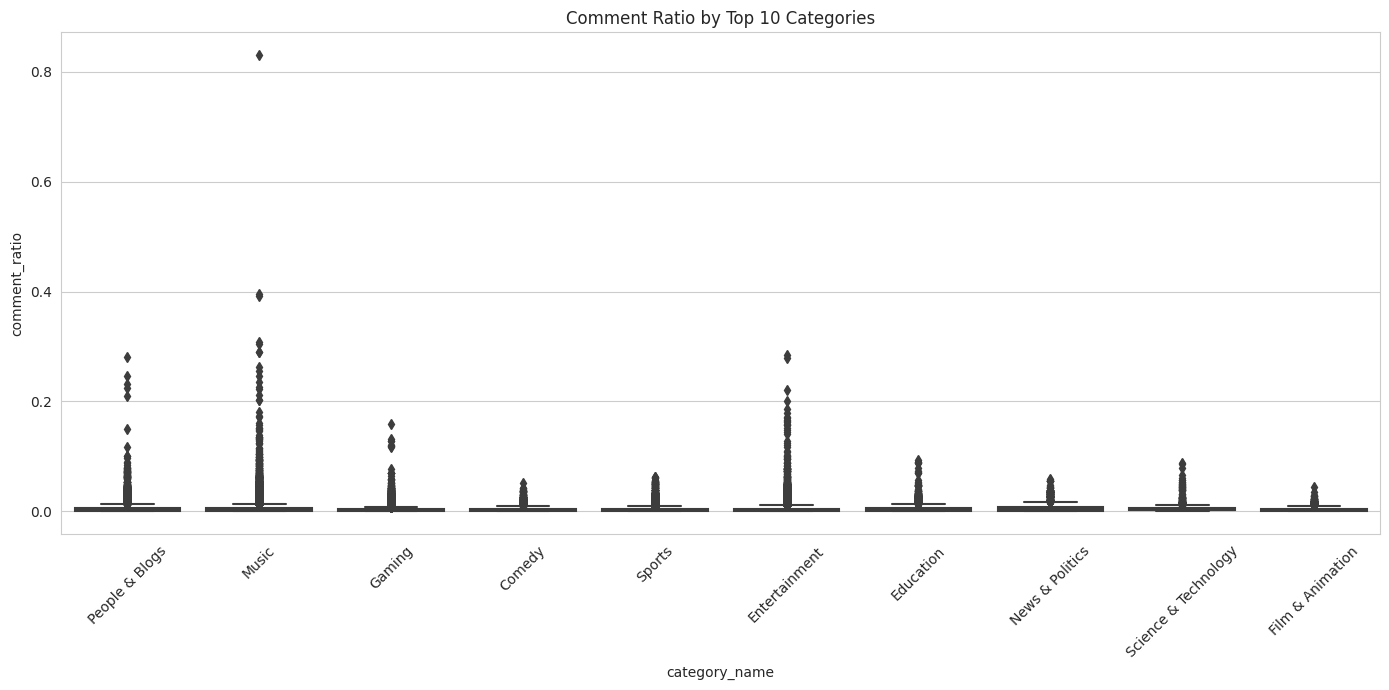

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Manual category mapping
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music",
    15: "Pets & Animals", 17: "Sports", 18: "Short Movies", 19: "Travel & Events",
    20: "Gaming", 22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 29: "Nonprofits & Activism"
}

df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')
df = df[df['view_count'] > 0]

# Add ratios
df['like_ratio'] = df['likes'] / df['view_count']
df['comment_ratio'] = df['comment_count'] / df['view_count']

# Map categoryId to readable category_name
df['categoryId'] = pd.to_numeric(df['categoryId'], errors='coerce')
df['category_name'] = df['categoryId'].map(category_map)

# Like ratio vs view count
fig = px.scatter(
    df.sample(min(10000, len(df))),
    x='view_count', y='like_ratio',
    color='country', log_x=True,
    title='Engagement vs Popularity'
)
fig.show()

# ratio by top categories
top_cats = df['category_name'].value_counts().nlargest(10).index
sns.boxplot(
    x='category_name', y='comment_ratio',
    data=df[df['category_name'].isin(top_cats)]
)
plt.title("Comment Ratio by Top 10 Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Channel Analysis

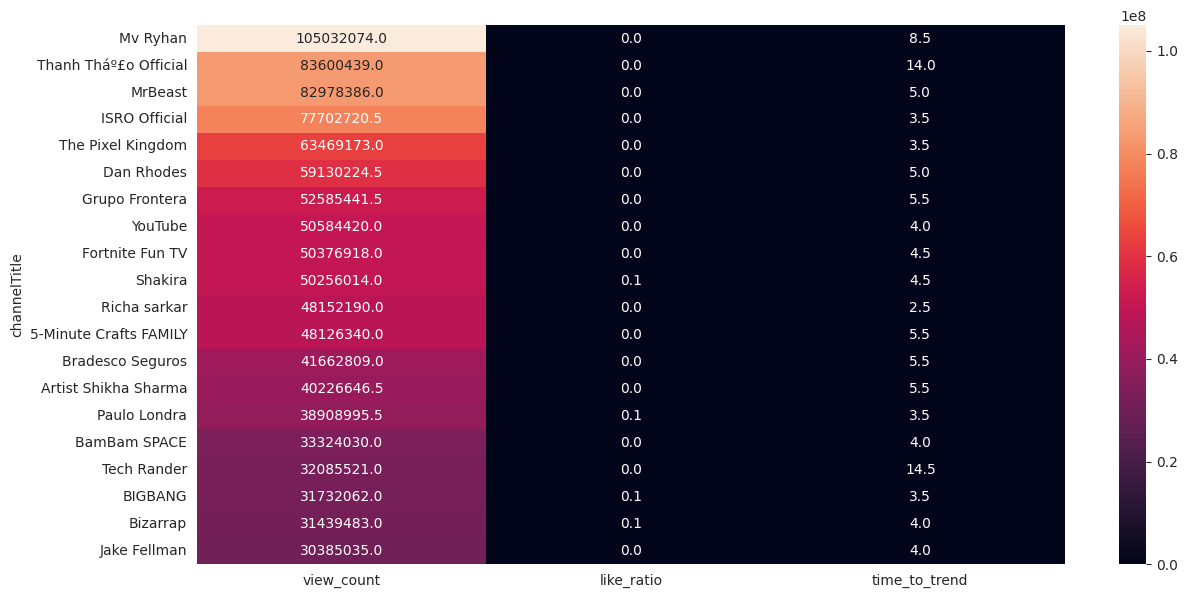

In [ ]:
#  Top channels by trending frequency
top_channels = df['channelTitle'].value_counts().nlargest(20)
px.bar(top_channels, title='Most Frequent Trending Channels').show()

# Channel performance heatmap
channel_stats = df.groupby('channelTitle').agg({
    'view_count': 'median',
    'like_ratio': 'median',
    'time_to_trend': 'median'
}).sort_values('view_count', ascending=False).head(20)
sns.heatmap(channel_stats, annot=True, fmt='.1f')
plt.show()

Content Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



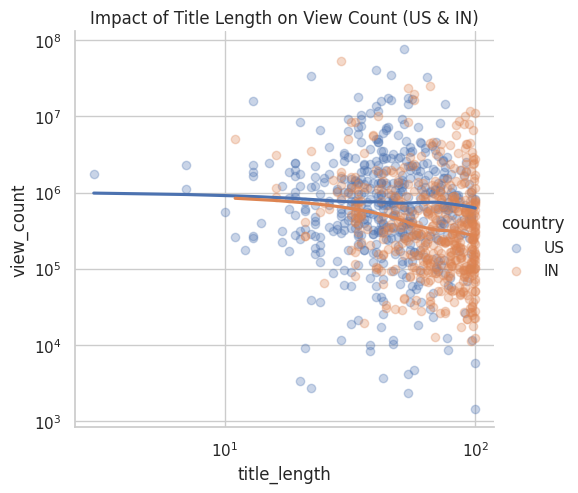

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

#  Loading  both datasets
us_df = pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")
in_df = pd.read_csv("/kaggle/input/youtube-new/INvideos.csv")

#  Adding  'country' column
us_df['country'] = 'US'
in_df['country'] = 'IN'

#  Combination of the  datasets
df = pd.concat([us_df, in_df], ignore_index=True)

# Clean and conversion of the  necessary columns
df['view_count'] = pd.to_numeric(df['views'], errors='coerce')
df['title'] = df['title'].astype(str)
df['tags'] = df['tags'].astype(str)
df['title_length'] = df['title'].apply(len)

# Title Length vs View Count 
sns.set(style="whitegrid")
sns.lmplot(x='title_length', y='view_count',
           data=df.sample(min(1000, len(df))),
           hue='country',
           lowess=True,
           scatter_kws={'alpha': 0.3})
plt.xscale('log')
plt.yscale('log')
plt.title("Impact of Title Length on View Count (US & IN)")
plt.show()

# Most Common Tags (Combined)
tags_counter = Counter()
for tags in df['tags'].dropna().str.split('|'):
    tags_counter.update(tags)

top_tags_df = pd.DataFrame(tags_counter.most_common(20), columns=['Tag', 'Count'])

# Plotting the Tags
fig = px.bar(top_tags_df, x='Count', y='Tag', orientation='h',
             title='Top 20 Most Common Video Tags (US + IN)')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


Geographic Analysis

In [ ]:

import pandas as pd
import plotly.express as px
#loading dataset again
us_df = pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")
in_df = pd.read_csv("/kaggle/input/youtube-new/INvideos.csv")

#  Adding d 'country' column
us_df['country'] = 'US'
in_df['country'] = 'IN'

# Combine datasets
df = pd.concat([us_df, in_df], ignore_index=True)

#  Convert views to numeric
df['view_count'] = pd.to_numeric(df['views'], errors='coerce')

#  Map category_id to category_name
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals",
    17: "Sports", 18: "Short Movies", 19: "Travel & Events", 20: "Gaming",
    21: "Videoblogging", 22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 29: "Nonprofits & Activism"
}
df['category_name'] = df['category_id'].map(category_map)

#  Dropping  rows without valid category
df = df.dropna(subset=['category_name'])


fig1 = px.box(df, x='country', y='view_count', log_y=True,
              title='View Count Distribution by Country')
fig1.show()


cat_by_country = df.groupby(['country', 'category_name']).size().unstack(fill_value=0)

# Normalization of the  per country
cat_by_country_normalized = cat_by_country.div(cat_by_country.sum(axis=1), axis=0)

# Plot as heatmap
fig2 = px.imshow(cat_by_country_normalized,
                 labels=dict(x="Category", y="Country", color="Preference"),
                 title="Category Preferences by Country (Normalized)",
                 aspect="auto")
fig2.update_xaxes(side="top")
fig2.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



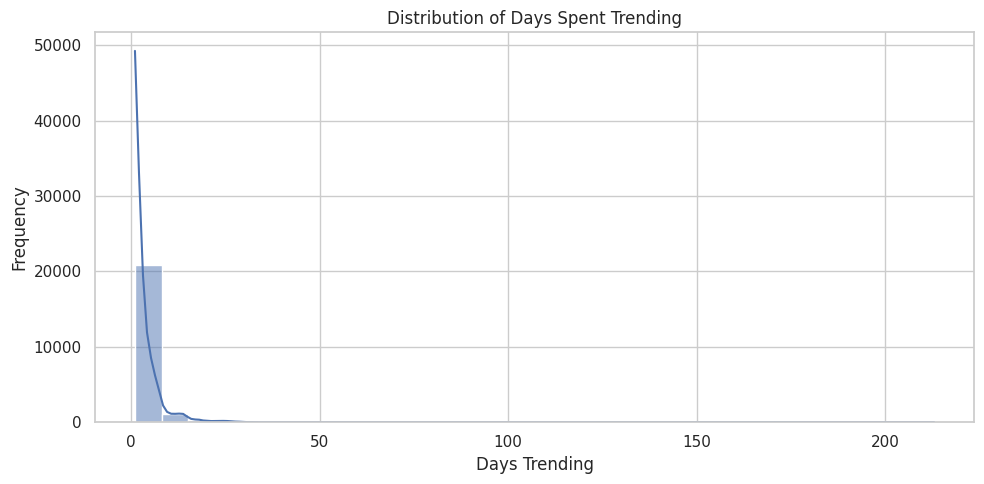

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


us = pd.read_csv('/kaggle/input/youtube-new/USvideos.csv')
in_ = pd.read_csv('/kaggle/input/youtube-new/INvideos.csv')

us['country'] = 'US'
in_['country'] = 'IN'

df = pd.concat([us, in_], ignore_index=True)

# Change the name  columns for consistency
df.rename(columns={
    'views': 'view_count',
    'publish_time': 'publish_time',
    'category_id': 'categoryId'
}, inplace=True)

#  Converting  date columns properly
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

# Creation of  like_ratio safely
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'])
df['like_ratio'] = pd.to_numeric(df['like_ratio'], errors='coerce')
df['like_ratio'] = df['like_ratio'].replace([float('inf'), float('-inf')], pd.NA)

# Trending Duration
trend_duration = df.groupby('video_id')['trending_date'].agg(['min', 'max'])
trend_duration['days'] = (trend_duration['max'] - trend_duration['min']).dt.days + 1

# plotting the trending Duration
plt.figure(figsize=(10, 5))
sns.histplot(trend_duration['days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days Spent Trending')
plt.xlabel('Days Trending')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Performance by Publish Hour
hour_stats = df.groupby('publish_hour').agg({
    'view_count': 'median',
    'like_ratio': 'median'
}).reset_index()

# Cleanning  NaNs/Infs values 
hour_stats = hour_stats.replace([float('inf'), float('-inf')], pd.NA)
hour_stats = hour_stats.dropna()

# Melt for Plotly
hour_stats_long = hour_stats.melt(id_vars='publish_hour',
                                  value_vars=['view_count', 'like_ratio'],
                                  var_name='metric', value_name='value')

# Plot Performance by Hour
px.line(hour_stats_long,
        x='publish_hour',
        y='value',
        color='metric',
        title='Performance by Publish Hour (Median View Count & Like Ratio)').show()


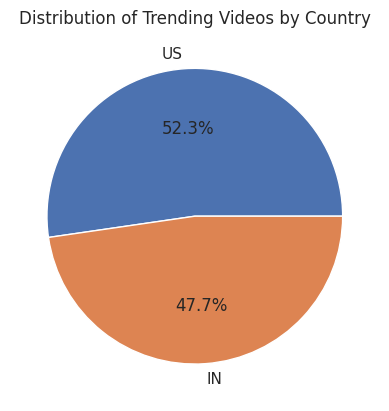

In [ ]:
country_counts = df['country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Trending Videos by Country")
plt.show()

Average views per country

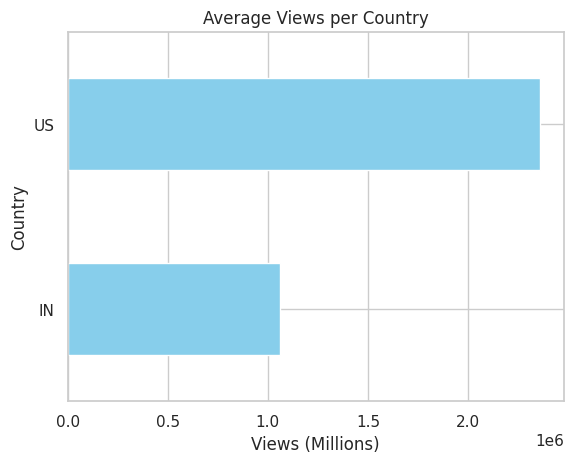

In [ ]:
avg_views = df.groupby('country')['view_count'].mean().sort_values()
avg_views.plot(kind='barh', color='skyblue')
plt.title("Average Views per Country")
plt.xlabel("Views (Millions)")
plt.ylabel("Country")
plt.show()

Likes vs dislikes

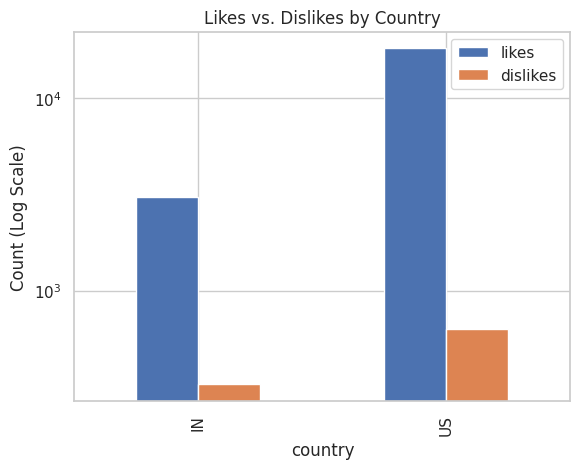

In [ ]:
engagement = df.groupby('country')[['likes', 'dislikes']].median()
engagement.plot(kind='bar', stacked=False)
plt.title("Likes vs. Dislikes by Country")
plt.ylabel("Count (Log Scale)")
plt.yscale('log')
plt.show()

Top categories

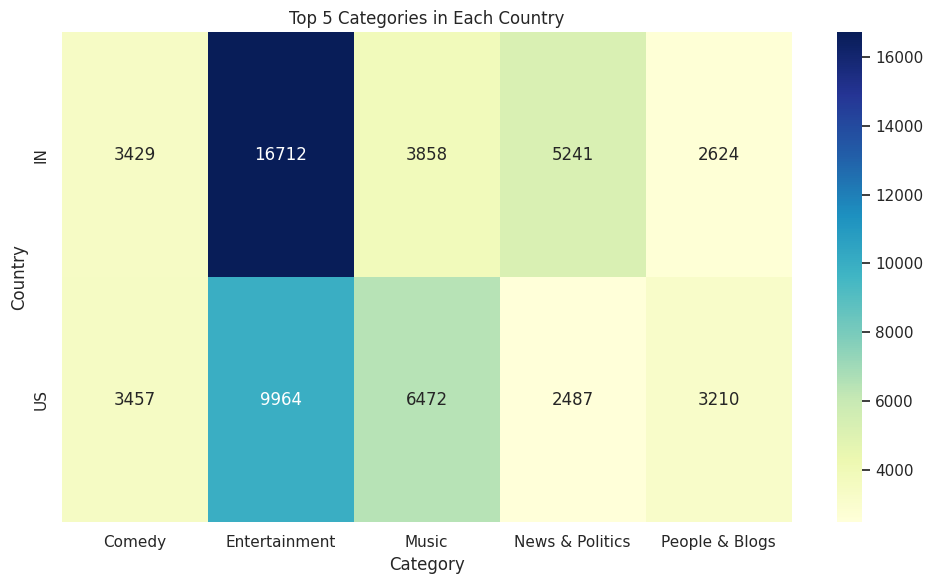

In [ ]:
us['country'] = 'US'
in_['country'] = 'IN'

df = pd.concat([us, in_], ignore_index=True)

#  Rename and prepare columns
df.rename(columns={
    'views': 'view_count',
    'category_id': 'categoryId'
}, inplace=True)

# Define categoryId  to category_name mapping
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music", 15: "Pets & Animals",
    17: "Sports", 18: "Short Movies", 19: "Travel & Events", 20: "Gaming",
    21: "Videoblogging", 22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology", 29: "Nonprofits & Activism"
}

#  Map categoryId to category_name
df['category_name'] = df['categoryId'].map(category_map)

#  Top 5 Categories by Country (heatmap)
top_cats = df['category_name'].value_counts().nlargest(5).index
cat_by_country = df[df['category_name'].isin(top_cats)].groupby(['country', 'category_name']).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(cat_by_country, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Top 5 Categories in Each Country")
plt.ylabel("Country")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


Time to Trend Box comparison